In [5]:
# Initialize Otter
import otter
grader = otter.Notebook("proj02.ipynb")

<table style="width: 100%;" id="nb-header">
    <tr style="background-color: transparent;"><td>
        <img src="https://data-88e.github.io/assets/images/blue_text.png" width="250px" style="margin-left: 0;" />
    </td><td>
        <p style="text-align: right; font-size: 10pt;"><strong>Economic Models</strong>, Fall 2024<br>
            Dr. Eric Van Dusen<br>
        Umar Maniku<br>
        Akhil Venkatesh</p></td></tr>
</table>

# Project 2: The Cobb-Douglas Production Function

<!-- ## Due Dates and Important Information:

- This project is in three parts.
- The whole project (all three parts) will be due 2 Mondays from now, on March 16, 2020 at 11:59pm on Gradescope.
- **Do not change any of the given variable or function names as this would cause autograder problems. Make sure to name your columns and tables exactly as the questions ask you to.** -->

In [6]:
from utils import *
import pandas as pd
from datascience import *
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
plt.style.use("seaborn-v0_8-muted")

The goal of this project is to gain experience completing the following key steps in the data science pipeline:

1. Cleaning and filtering data collected from online sources
2. Identifying and visualizing overall trends in the data using a process called Exploratory Data Analysis (EDA)
3. Using the data to complete a problem of prediction

We hope that by the end of this project, you will see how the skills you have learned in Data 8 and this class can prepare you for dealing with real world datasets, and how you can use them to answer questions about the economy or the world.

The question you will be answering today is the following: 

> How can we apply the Cobb-Douglas Production Function to understand the different ways countries produce output or GDP?

## Part 1: Simplifying the Problem

Let's load in the data for this project. The cell below loads the data from `pwt1001.csv` and saves it to the variable `data`. Take a look at the first 10 rows.

In [7]:
file_name = "pwt1001.csv"
data = to_table(file_name)
data

countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,ccon,cda,cgdpe,cgdpo,cn,ck,ctfp,cwtfp,rgdpna,rconna,rdana,rnna,rkna,rtfpna,rwtfpna,labsh,irr,delta,xr,pl_con,pl_da,pl_gdpo,i_cig,i_xm,i_xr,i_outlier,i_irr,cor_exp,statcap,csh_c,csh_i,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k
ABW,Aruba,Aruban Guilder,1950,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1951,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1952,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1953,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1954,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1955,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1956,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1957,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1958,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
ABW,Aruba,Aruban Guilder,1959,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


Notice that there are a lot of `-1` values. This dataset uses `-1` to indicate missing data for a given country-year combination.

To get an idea of the dataset's geographic scope, let us find out what countries are included, and if they are spelled in interesting ways. This will be helpful for us later on in our analysis.

**Question 1.1:** Create a two-column table called `all_countries`. Its first column will be called `Country` and the second `Earliest Year`. It should contain all of the countries that appear in the `data` table sorted in alphabetical order with the earliest year they appear in the dataset where the `cgdpe` column is not `-1`.

Hint: You may want to use `where` and `group`. 


In [8]:
all_countries = data.where("cgdpe",are.not_equal_to(-1)).select("country", "year").group("country", min).relabel("year min","Earliest Year").relabel("country","Country")
all_countries

Country,Earliest Year
Albania,1970
Algeria,1960
Angola,1970
Anguilla,1970
Antigua and Barbuda,1970
Argentina,1950
Armenia,1990
Aruba,1970
Australia,1950
Austria,1950


In [9]:
grader.check("q1_1")

q1_1 results: All test cases passed!

Take a look at ```data``` again. Notice that it has a lot of columns, most of which we won't need. As we will be using the Cobb-Douglas production function, think about what variables are needed in the equation, and which ones are already present in the table. This is an important part of the data science process: understanding the dataset that you are using. Most real-world datasets provide documentation listing the definitions and equations behind each variable. 

PWT provides this and has identified three variables that will be helpful to us:
1. `cn` $\Rightarrow$ Capital Stock in millions of USD
2. `cgdpe` $\Rightarrow$ Expenditure-side Real GDP in millions of USD
3. `emp` $\Rightarrow$ Number of Persons employed in millions

**An important note: for the sake of simplicity, we will be assuming that nations exhibit constant returns to scale.**

**Question 1.2:** Without assuming constant return to scale, the Cobb-Douglous Production Function is given by 

$$ Y = A K^\alpha L^\beta $$

Which variable in the Cobb-Douglas function represents the following? Fill in the blanks. 

- $Y$ measures the dollar value of goods and services produced in a country
- \_\_ measures total factor productivity: how effectively a country uses its inputs in producing output
- \_\_ measures the amount of capital in a country
- \_\_ measures the amount of labor in a country
- \_\_ measures how much emphasis is placed on capital 

Assign an array of letters corresponding to your answer to `q1_2` below. For example, `q1_2 = make_array('alpha', 'beta', 'K', 'L')`.


In [10]:
q1_2 = make_array("A", "K", "L", "alpha")

In [11]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Again, for the remainder of this project, we will assume nations exhibit constant return to scale, unless otherwise specified.**   
**That is, we will have**

$$ Y = A K^\alpha L^{1-\alpha}$$



**Question 1.3:**
Assign the variable <code>missing_variables</code> to an array containing the Cobb-Douglas function variables that are missing from the dataset.


In [12]:
missing_variables = make_array("A", "alpha")

In [13]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 1.4:**
Remove all columns from `data` except for `cn`, `cgdpe`, `emp`, `country` and `year`. Ensure that `country` and `year` are the two left-most columns respectively. Call the new table `cleaned_data` and display its first five rows. Rename the `cn` column to `Capital Stock`, `cgdpe` to `Real GDP` and `emp` to `Labor Force`.


In [42]:
cleaned_data = data.select("country", "year", "cn", "cgdpe", "emp").relabel(["cn","cgdpe","emp"],["Capital Stock", "Real GDP", "Labor Force"])
cleaned_data.show(5)

country,year,Capital Stock,Real GDP,Labor Force
Aruba,1950,-1,-1,-1
Aruba,1951,-1,-1,-1
Aruba,1952,-1,-1,-1
Aruba,1953,-1,-1,-1
Aruba,1954,-1,-1,-1


In [15]:
grader.check("q1_4")

q1_4 results: All test cases passed!

Our goal will be to predict what $\alpha$ and $A$ are for each of the countries that we will be examining. From these, we will be able to explore how output is produced in each of these countries. The question is, how can we use the Cobb-Douglas Production function to solve for the missing variables? An easy way would be to take the natural log of the equation, making it linear, providing us with ways to quantify $\alpha$ and $A$.

<!-- BEGIN QUESTION -->

**Question 1.5:**
In the cell below, using LaTeX, take the natural log of the Cobb-Douglas Production Function and rewrite it as a **linear function** of one variable. Show all of your work. Full credit will not be given if you just display the final simplified equation without showing any work.

_Hint:_ Begin by taking natural log of both sides of the Cobb-Douglas Production Function, that is $\ln{Y} = \ln{(A K^\alpha L^{1-\alpha})}. $

Note: We do not officially cover LaTeX till Week 6: Utility, so if you are completing this project prior to that lecture, feel free to either skip this question and come back to it later, or learn something new!


$$\begin{aligned}
\ln{Y} &= \ln{(A K^\alpha L^{1-\alpha})}\\
\ln(Y) &= \ln(A)+\ln(K^\alpha)+\ln(L^{1-\alpha})\\
\ln(Y) &= \ln(A)+\alpha\ln(K)+(1-\alpha)\ln(L)\\
\ln(Y) &= \ln(A)+\alpha\ln(K)+\ln(L)-\alpha\ln(L)\\
\ln(Y) -\ln(L)&= \ln(A)+\alpha\ln(K)-\alpha\ln(L)\\
\ln(\frac{Y}{L})&= \ln(A)+\alpha(\ln(K)-\ln(L))\\
\ln(\frac{Y}{L})&=\ln(A)+\alpha \ln(\frac{K}{L})
\end{aligned}
$$

<!-- END QUESTION -->

## Part 2: Exploring the Data

Whenever we are dealing with a large dataset like PWT, it is a good idea to see how the variables interact with each other. A common method, especially when dealing with economic data, is to generate a time series. This is a plot of some variable on the $y$-axis and time on the $x$-axis. We are going to do just that for our important Cobb-Douglas variables for different countries.

In [16]:
# Run this cell to see a table of all the countries in the dataset.
# Select two countries and proceed to the next code question.
all_countries["Country"]

array(['Albania', 'Algeria', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Cayman Islands', 'Central African Republic',
       'Chad', 'Chile', 'China', 'China, Hong Kong SAR',
       'China, Macao SAR', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       'Croatia', 'Curaçao', 'Cyprus', 'Czech Republic', "Côte d'Ivoire",
       'D.R. of the Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji',
       'Finland', 'France', 'G

**Question 2.1:**
1. Create an array of four countries, the US, China, and two of your choice from the list above (though not Canada or Mexico), in **alphabetical order** and call this `country_array`.
2. Using this array, construct `comparison_data`, a table containing GDP, Capital Stock and Labor for these four countries in `country_array` from 1990 to 2019. 

_Use the cell above to check if your countries of choice exist in the dataset._ Make sure to use the country name exactly as it appears in the data table.

_Hint:_ Look at the <a href="https://ds-connectors.github.io/econ-fa20/python-reference.html">Python Reference</a> for a table function you can use.


In [17]:
country_array = make_array("Cambodia", "China", "Germany", "United States")
comparison_data = cleaned_data.where("country", are.contained_in(country_array)).where("year", are.between(1990,2020))
comparison_data

country,year,Capital Stock,Real GDP,Labor Force
China,1990,4.76376e+06,2.96752e+06,660
China,1991,5.05137e+06,3.12739e+06,676
China,1992,5.50687e+06,3.37258e+06,683
China,1993,6.1793e+06,3.61229e+06,689
China,1994,6.91171e+06,3.94591e+06,694
China,1995,7.7044e+06,4.34385e+06,699
China,1996,8.57896e+06,4.63467e+06,706
China,1997,9.51087e+06,4.87596e+06,713
China,1998,1.06504e+07,4.87638e+06,721
China,1999,1.18116e+07,5.13595e+06,729


In [18]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Note:** If you ever need to refer to a list of the countries you selected in your code, do **not** use `country_array`. When you place the data in `comparison_data`, Python will automatically re-order the countries. Using `country_array` will cause a mis-match between your rows of data in `comparison_data` and the country it is actually from.

<!-- BEGIN QUESTION -->

**Question 2.2:**
To help us in later questions, fill in the blanks in the `country_table_plotter` function below. Its inputs will be a table of the form `comparison_data` and the names of the two columns plotted, `columnX` and `columnY`. The `country_table_plotter` function will plot `columnX` versus `columnY` using data from `data_table` for all the countries 

_Hint:_ Look at the <a href="https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html"> Matplotlib Plotting Reference</a> for ideas of what to place in the blanks.


In [19]:
def country_table_plotter(data_table, columnX, columnY):
    
    countries = np.unique(data_table.column("country"))
    for country in countries:
        current_country_table = data_table.where("country", country)
        plt.plot(current_country_table.column(columnX), current_country_table.column(columnY), label = country, linewidth = 1.5)
    
    ### Do not change the code below ###
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 'x-large')
    plt.xlabel(columnX)
    plt.ylabel(f"{columnY} (Logarithmic Scale)")
    plt.grid()
    plt.yscale("log")
    
    return countries, columnX, columnY

<!-- END QUESTION -->

**Question 2.3:**
Produce a plot of time and capital stock for the countries in your table.


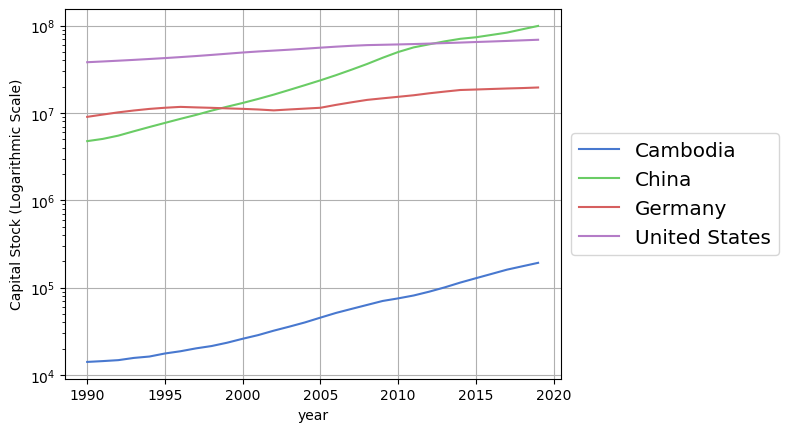

In [20]:
q2_3 = country_table_plotter(comparison_data, "year", "Capital Stock")

In [21]:
grader.check("q2_3")

q2_3 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.4:**
Identify differences between the countries in your plot above and discuss what surprised you.


We can definitely see that there are significant differences in the magnitude and growth trends of the capital stock with relation to different countries. The US remains relatively high throughout the whol duration of time (1990-2019), showing just slow and steady growth which suggests it is a developed and stable economy with large amounts of capital at its disposal. Germany is lower than the US but does show modest growth, most likeley due to more restrained EU laws, but is still relatively high as it is a highly industrailized nation in the EU. There is definetly steady investment in the German industries but defintely at a slower rate than China. China has had a rapid capital stock rise indicating huge economic expansion and industrailization even overtaking Germany. Cambodia is also seeing good growth in capital stock but is definetly lagging behind the other nations primarily due to the fact it is still a developing nation. What really surprises me is how much China's capital stock actually grew in such little time. 

<!-- END QUESTION -->

**Question 2.5:**
Produce a similar plot, but this time of time and labor for the countries in your table.


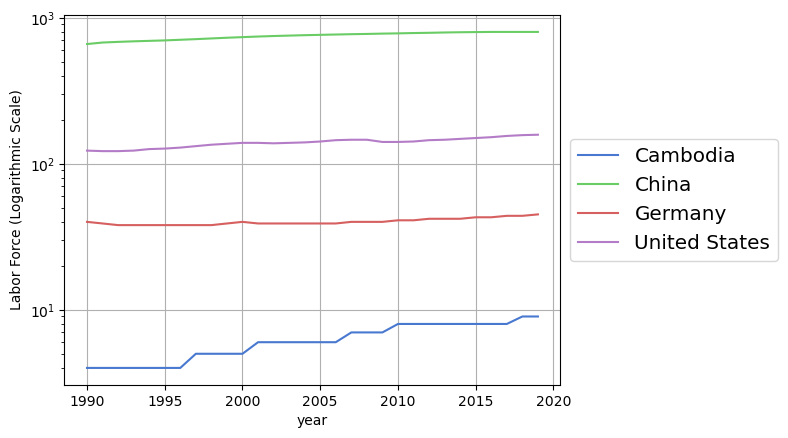

In [22]:
q2_5 = country_table_plotter(comparison_data, "year", "Labor Force")

In [23]:
grader.check("q2_5")

q2_5 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.6:**
Identify differences between the countries in your plot above and discuss what surprised you.


For the US, Germany, and China, labour force has remained relatively stable with no big changes which suggests a very slowly growing workforce. This might be due to demographic trends where an aging population might limit labour force expansion, or the higher income countries might allow for more people to leave the nation to work somewhere else instead. China has the highest labour force however, it is steady as well. The most probable cause might be the one-child policy and the transition from labour-intensive industries to capital-intensive as they are at the forefront of automation now. Cambodia, once again, is the smallest amongst the countries but does show that labour force increases which indicates its shift from agrarian to industrial. I was expecting China's labour force to actually continue increasing and not plateau but I guess it does align with what we are seeing in the news now, how China is a leader in the EV and automation markets. 

<!-- END QUESTION -->

**Question 2.7:**
Create a plot of time and GDP for the countries in your table.


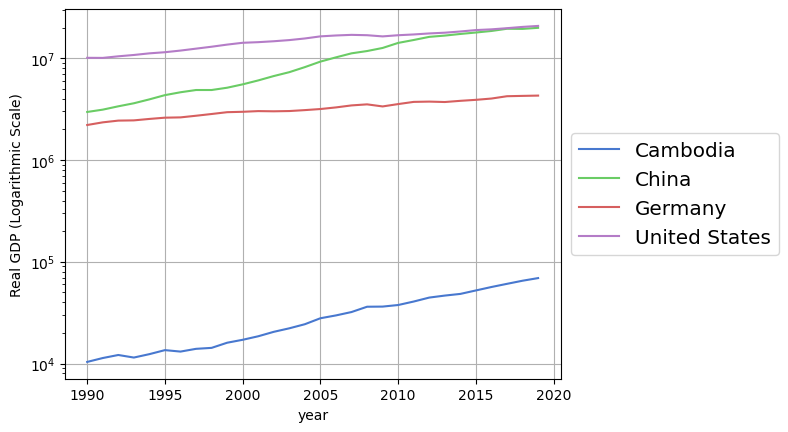

In [24]:
q2_7 = country_table_plotter(comparison_data, "year", "Real GDP")

In [25]:
grader.check("q2_7")

q2_7 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 2.8:**
Using your knowledge of the Cobb-Douglas Production Function, identify differences between the countries and discuss these in relation to your findings about each of the country's levels of capital stock and labor. Also note about how these have changed over time, if at all.


The Cobb-Douglas function is defined as $Y = A K^\alpha L^{1-\alpha}$, where Y is the output, K is the capital, and L is the labour, and A is the total factor productivity. The US has high capital stock, a stable labour force which may indicate that the output growth comes largely from the total factor of productivity rather than K or L. Over time, the slow increase in capital sotck is probably compensating for the labour force growth. Looking at Germany, it is similar to the US. It's economic growth is probably driven by tech innovations rather than changes in cpaital and labour inputs. The steady growth in capital stock with almost no labour growth implies Germany's reliance on productivity gains by capital. China's early labour-intensive growth dominated output, but as capital stock increased, and growth started shifting due to capital-intensive industries, we get a higher K value and thus higher A value. And this rapid industrialization means a high $\alpha$ which explains why output grows despite a slower labour. Cambodia shows increases in both capital stock and labour force. Since both inputs are increasing, its growth might be more evenly split between capital accumulation and labor expansion. The lack of rapid industrialization, however, suggests lower productivity growth compared to China. 

<!-- END QUESTION -->

## Part 3: Prediction and Comparison

We are now going to provide numerical backing to your discussions of differences between the nations. We will predict values for $\alpha$ and $A$ for each of the 4 countries that we are examining. To do this, we will revisit the equation that you derived in question 1.4. 

**Question 3.1:**
A key step in the original paper by Cobb and Douglas was that they converted the data into an index. This is important because the data is measured in different units. Do this for each country and each of the variables in `comparison_data`. Let the 2011 value for each variable in each country be the base year, i.e. 100. Place this in a new table called `indexed_data` together with `country` and `year` columns.

_Hint:_ The formula for calculating an index is as follows:
$$
\dfrac{Q_{\text{current year}}}{Q_{\text{base year}}} \cdot 100 \, \text{ for some variable } Q
$$


In [65]:
# We need to sort comparison_data in alphabetical order because the countries array is in alphabetical order
comparison_data = comparison_data.sort('country')

base_values = comparison_data.where("year", 2011)
countries = np.unique(comparison_data.column("country"))
indexed_Ks = make_array()
indexed_Ls = make_array()
indexed_Ys = make_array()

for country in countries:
    country_data = comparison_data.where("country", country)
    base_country_data = base_values.where("country", country)
    
    baseK = base_country_data.column("Capital Stock").item(0)
    baseL = base_country_data.column("Labor Force").item(0)
    baseY = base_country_data.column("Real GDP").item(0)

    indexed_Ks = np.append(indexed_Ks, country_data.column("Capital Stock") / baseK * 100)
    indexed_Ls = np.append(indexed_Ls, country_data.column("Labor Force") / baseL * 100)
    indexed_Ys = np.append(indexed_Ys, country_data.column("Real GDP") / baseY * 100)

indexed_data = Table().with_columns(
    "country", comparison_data.column("country"),
    "year", comparison_data.column("year"),
    "Indexed K", indexed_Ks,
    "Indexed L", indexed_Ls,
    "Indexed Y", indexed_Ys,
)
indexed_data

country,year,Indexed K,Indexed L,Indexed Y
Cambodia,1990,17.3344,50,25.4999
Cambodia,1991,17.7146,50,27.846
Cambodia,1992,18.1662,50,29.8285
Cambodia,1993,19.2625,50,28.1531
Cambodia,1994,19.9811,50,30.4058
Cambodia,1995,21.6557,50,33.2998
Cambodia,1996,22.9735,50,32.2213
Cambodia,1997,24.7859,62.5,34.2898
Cambodia,1998,26.3547,62.5,35.0415
Cambodia,1999,28.775,62.5,39.3652


In [27]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2:**
Using the equation you derived in Part 1 and the `indexed_data` table, calculate the two log ratios that you need to perform linear regression. Place them in the table `log_ratios` with `country` and `year` as the two leftmost columns respectively. The `log_ratios` table should have 4 columns: `country`, `year`, `ln(Y/L)`, and `ln(K/L)`.


In [54]:
log_ratios = indexed_data.select("country", "year").with_columns("ln(Y/L)", np.log(indexed_data.column("Indexed Y") / indexed_data.column("Indexed L")), "ln(K/L)", np.log(indexed_data.column("Indexed K") / indexed_data.column("Indexed L"))) 
log_ratios

country,year,ln(Y/L),ln(K/L)
Cambodia,1990,-0.673347,-1.05933
Cambodia,1991,-0.585333,-1.03763
Cambodia,1992,-0.516558,-1.01246
Cambodia,1993,-0.574366,-0.953864
Cambodia,1994,-0.497388,-0.917239
Cambodia,1995,-0.406473,-0.836755
Cambodia,1996,-0.439395,-0.777683
Cambodia,1997,-0.600319,-0.924891
Cambodia,1998,-0.578633,-0.86352
Cambodia,1999,-0.462284,-0.77566


In [29]:
grader.check("q3_2")

q3_2 results: All test cases passed!

The function `country_table_scatter` defined below takes in a data table, $x$ column label, and $y$ column label and plots these columns as against each other for each country in `data_table`.

In [30]:
def country_table_scatter(data_table, columnX, columnY):
    # First getting a list of all the countries in data_table
    country_list = data_table.group("country").column("country")
    
    # For each country, creating a scatter plot of columnX vs. columnY
    for country in country_list:
        curr_data_table = data_table.where("country", country)
        curr_data_table.scatter(columnX, columnY)
        plt.title(country)
        plt.grid()

<!-- BEGIN QUESTION -->

**Question 3.3.1:**
Using the `country_table_scatter` function provided, plot the log ratios for each country from the `log_ratios` table below.


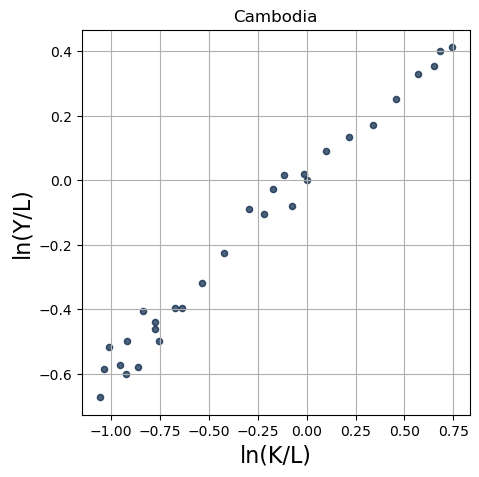

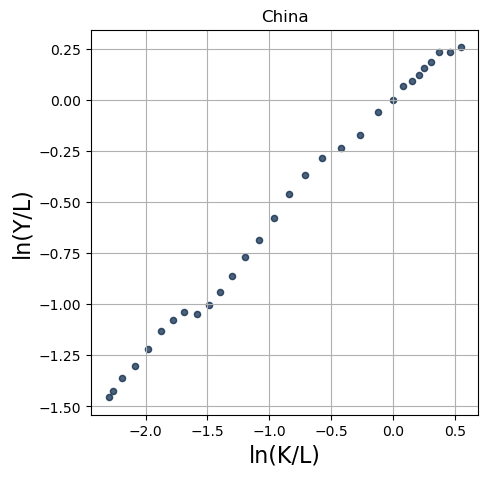

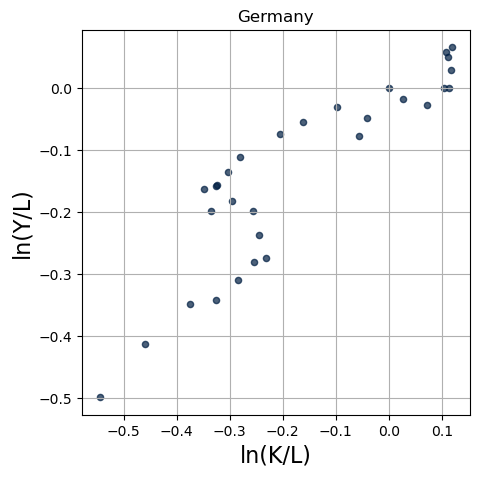

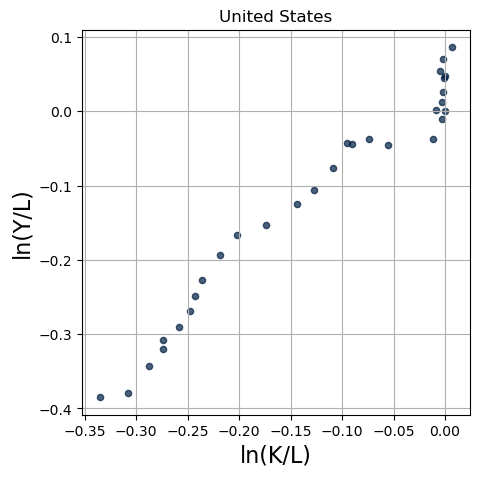

In [31]:
country_table_scatter(log_ratios, "ln(K/L)", "ln(Y/L)")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.3.2:**
What do you notice about the scatter plots? How do they differ?


Cambodia and China both exhibit a strong positive linear relationship between $\ln(K/L)$ and $\ln(Y/L)$ this means that as capital per labor increases, output per labor also increases significantly. Cambodia also has a part in the middle where it loops around. Germany and the US both exhibit non-linear behaviour in the middle and end values of $\ln(K/L)$ respectively due to recessions or changes in labour force. 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Extra Credit Question:**
Let's take a look at the scatter plot for the U.S in particular. What do you notice as the value of ln(K/L) nears -0.10 to 0.00? What could be the reason behind the stagnation?


The vertical section of our plot occurs during the 2008 recession which would have a rise in output per worker but we get little change in capital per worker as mass layoffs occured which drops L which increases K/L increasing ln(K/L) assuming K is constant but the fewer workers would make it seem that productivity was higher when in reality it wasn't. The ratio of Y/L is constant so if L goes down, Y must also go down so output is also down which also makes sense for a recession.

<!-- END QUESTION -->

To help you compare, the code below will plot all of the scatter plots on the same axis. Remember, the axes are in terms of logarithms. Thus, even small differences in slope or intercepts would yield big changes.

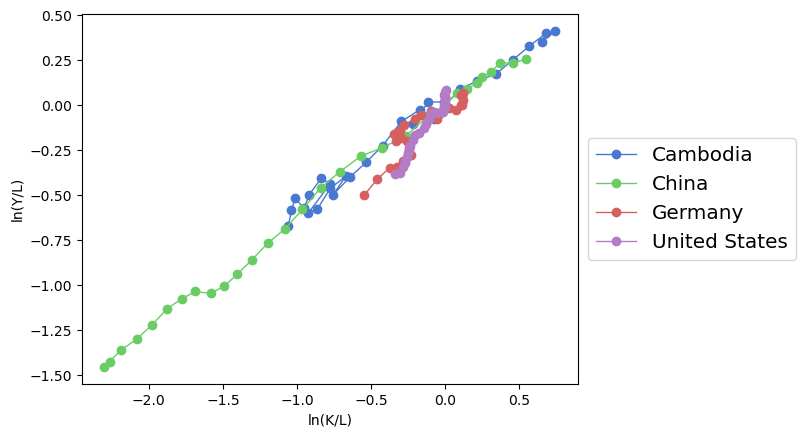

In [32]:
all_scatter(log_ratios, "ln(K/L)", "ln(Y/L)")

Now, we want to make a linear approximation of the curves above. How will we do this? Through linear regression.

We will be using NumPy's `polyfit` function to get the $\alpha$ and $A$ values for each country. You will learn more about linear regression later in Data 8, but think of it as fitting a line to a set of data points. The polyfit function would return the slope and intercept of such a line. Here is the link to the documentation of the <a href = "https://numpy.org/doc/1.18/reference/generated/numpy.polyfit.html"> function</a>: 

Let us break down how this function works by taking a look at the examples section of the documentation:

```python
import numpy as np
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 1.0, 2.0, 3.0])
model = np.polyfit(x, y, 1)
```

The first argument to `np.polyfit()` is the array of data $x$, the second argument contains the values we wish to estimate $y$. The last argument specifies the degree of the polynomial we wish to use. A 1-degree polynomial takes the following form: $y = a+ b x$. A 2-degree polynomial looks like this: $y = a + bx + cx^2$.

`np.polyfit()` returns an array of the coefficients of the linear regression line. A degree 1 polynomial would contain two elements. A degree 2 polynomial would contain three elements. Let's look at the structure of the array:

```python
>>> model
array([ 0.53428571, -0.05238095])
>>> model.item(0) # The slope term
0.53428571
>>> model.item(1) # The intercept term
-0.05238095
```

From this, we can construct the equation of the regression line as a function of $x$: $y = -0.05238095 + 0.53428571x$. 

Take a look at the derivation for the Cobb-Douglas production function we did in Part 1 and think about what kind of polynomial we want to fit on our data.

**Question 3.4:**
Using `np.polyfit`, fit the data taken from each country. 

_Hint:_ Fill in the `<country>_x` and `<country>_y` arrays to make your life easier. You will need to call `np.polyfit` four times (once for each country).


In [38]:
# Create arrays of the data we will need from each country.
# Think about which variable should be on each axis.

china_x = log_ratios.where("country", "China").column("ln(K/L)")
china_y = log_ratios.where("country", "China").column("ln(Y/L)")
us_x = log_ratios.where("country", "United States").column("ln(K/L)")
us_y = log_ratios.where("country", "United States").column("ln(Y/L)")
country1_x = log_ratios.where("country", "Germany").column("ln(K/L)")
country1_y = log_ratios.where("country", "Germany").column("ln(Y/L)")
country2_x = log_ratios.where("country", "Cambodia").column("ln(K/L)")
country2_y = log_ratios.where("country", "Cambodia").column("ln(Y/L)")

model_china = np.polyfit(china_x, china_y, 1)
model_us = np.polyfit(us_x, us_y, 1)
model_country1 = np.polyfit(country1_x, country1_y, 1)
model_country2 = np.polyfit(country2_x, country2_y, 1)

In [34]:
grader.check("q3_4")

q3_4 results: All test cases passed!

In [35]:
# for your reference
print(country_array)

['Cambodia' 'China' 'Germany' 'United States']


**Question 3.5:**
Now that we have fit the data of each country, we can then retrieve the slope and intercept of each fit. Using the equation you derived in Question 1.3, fill in the blanks in the print statements below such that they display the $\alpha$ and $A$ values for each country. Note that you will need to transform at least one of the variables.

**Note:** Python has special strings called **f-strings** where it fills in the value of a variable for you. For example:

```python
>>> arr = make_array(1, 2, 3)
>>> print(f"The second element of arr is {arr.item(1)}")
The second element of arr is 2
```

Fill `alpha_array` and `A_array` with the correct values from your `model_*` arrays. **Make sure their elements are in the same order as in the** `country_array`. Then, you will need to replace the `...` inside the curly braces in the f-strings print statements. You can use the example above as a reference. 


In [68]:
alpha_array = make_array(model_country2[0], model_china[0], model_country1[0], model_us[0])
A_array = make_array(np.exp(model_country2[1]), np.exp(model_china[1]), np.exp(model_country1[1]), np.exp(model_us[1])) # you may want to use np.exp here
for i in np.arange(len(country_array)):
    print(f"{country_array.item(i)} alpha value: {alpha_array[i]}")
    print(f"{country_array.item(i)} A value: {A_array[i]}")
    print()

Cambodia alpha value: 0.5833981763001155
Cambodia A value: 1.0048134249369283

China alpha value: 0.6223758383900692
China A value: 0.9961227233181271

Germany alpha value: 0.672713798946415
Germany A value: 0.9737101356326917

United States alpha value: 1.2301875466494678
United States A value: 1.0405598427417713



In [69]:
grader.check("q3_5")

q3_5 results: All test cases passed!

**Question 3.6:**
What do you notice about USA's $\alpha$ value? What does this say about our model's assumption of constant returns to scale?

<ol type="A" style="list-style-type: lower-alpha;">
    <li>USA's $\alpha$ value is greater than 1, and it violates our model's assumption. </li>
    <li>USA's $\alpha$ value is greater than 1, and it does not violate our model's assumption. </li>
    <li>USA's $\alpha$ value is less than 1, and it violates our model's assumption. </li>
    <li>USA's $\alpha$ value is less than 1, and it does not violate our model's assumption. </li>
</ol>

Assign a letter corresponding to your answer to `q3_6` below. For example, `q1_2 = 'a'`.


In [66]:
q3_6 = "a"

In [67]:
grader.check("q3_6")

q3_6 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 3.7:**
With reference to the $\alpha$ and $A$ values for each of the countries you have examined, do they indicate about that country's ability to produce output as measured through GDP? Compare and contrast how each country allocates capital and labor when producing output. How about the role of technology or research and development? 3-4 sentences should suffice.


The alpha values indicate the share of output attributed to capital of the country, while the A represents TFP for Cobb-Douglas which is basically how much technology and efficiency affects production. US has the highest A and alpha values, which alpha standing out as the highest compared to the lot which indicates a much stronger reliance on capital compared to other countries, while its A value suggests a slightly higher efficiency in using both capital and labor but pretty much equal to Cambodia in A values. Germany's alpha value also points to capital playing a significant role in output which would make sense as they have a highly industrialized and manufacturing economy, but its A value is lower so they are less efficient with the use of inputs compared to the US. China and Cambodia have lower alpha values, indicating a more labor-heavy economic structure which would make sense as both are rapidly expanding their economies with China seeing massive growth especially. China is more capital-intensive than Cambodia, but both may benefit less from technological advances or R&D compared to the US. With respect to R&D, the US gains much more from tech innovations as it has a higher A value. But Cambodia and China, despite their allocation of capital and labour, they will be less effective at utilizing these new advances to increase their ouput this is most likely due to the maturity of their economy. 

<!-- END QUESTION -->

**That's all! Hope you had fun analyzing the vast amount of data.**

---

**Acknowledgements:**
We would like to thank Professor Raymond Hawkins for his Economics 100B Problem Set that served as the basis for this assignment.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [70]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...



Your submission received the following results when run against available test cases:

    q1_1 results: All test cases passed!

    q1_2 results: All test cases passed!

    q1_3 results: All test cases passed!

    q1_4 results: All test cases passed!

    q2_1 results: All test cases passed!

    q2_3 results: All test cases passed!

    q2_5 results: All test cases passed!

    q2_7 results: All test cases passed!

    q3_1 results: All test cases passed!

    q3_2 results: All test cases passed!

    q3_4 results: All test cases passed!

    q3_5 results: All test cases passed!

    q3_6 results: All test cases passed!
